## Delivering data-driven employee churn

## Problem Description

### Project Overview

Employee turnover, also known as "employee churn," poses a considerable financial challenge for businesses. The actual cost associated with replacing an employee can be substantial. Particularly for IT service organizations, the rate at which employees leave, referred to as the churn rate, often falls within the range of 12% to 15%. This rate is notably high. Even if we conservatively assume a lower churn rate of 5%, the financial ramifications of an employee departing from the organization are significant. It can be approximated that the cost incurred when an employee leaves a company equals approximately 1.5 times their annual salary (Saradhi and Palshikar 2011).

This financial burden is undeniably unwelcome news for organizations contending with a high employee churn rate, also referred to as attrition. In essence, the cost of replacing employees remains a substantial burden for most employers due to factors such as the time and resources invested in recruiting and selecting replacements, sign-on bonuses, and the subsequent productivity loss during the transition period as the new employee adjusts to their role.

### Problem Statement

Gaining insight into the reasons behind employee departures and identifying when they are most likely to occur can inform strategies to enhance employee retention and facilitate proactive hiring planning. I will employ a systematic, step-by-step approach that can be applied to a variety of machine learning problems. This project aligns with the field commonly known as "HR Analytics" or "People Analytics."

#### In this research, we aim to address the following problem statement:

* How can we predict if active employee leaving the company?
* What are the primary indicators that an employee is on the verge of leaving the company?
* What policies or strategies can be implemented based on the findings to enhance employee retention?
* Since we have data on former employees, this project entails a standard supervised classification problem in which the label is a binary variable: 0 (active employee) and 1 (former employee). In this study, our target variable, denoted as Y, represents the likelihood of an employee leaving the company.

## Step1: Import packages

In [1]:
#for data manipulation
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for displaying all of the columns in the dataframes
pd.set_option('display.max_columns',None)
#!pip install xgboost : need to install xgboost
# for data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#for metrics
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,\
confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.tree import plot_tree

### Load dataset

In [2]:
df0=pd.read_csv("HR_comma_sep.csv")

In [3]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2: Prelimary EDA and data cleaning

In [4]:
#Get basic info about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The maximum value for average_monthly_hours may be an outlier, so we  need to double-check it later.

In [6]:
#display all column names
list(df0.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [7]:
#Rename columns 
df0=df0.rename(columns={'Work_accident':'work_accident',
                    'average_montly_hours':'average_monthly_hours',
                    'Work_accident':'work_accident',
                    'Department':'department',
                   'time_spend_company':'tenure'
                   })

## Check missing values

In [8]:
#check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There is no missing value.

## Check duplicates

In [9]:
#check for duplicates
print("Number of duplicates:",df0.duplicated().sum(),",",\
      "Percentage of duplicates:",df0.duplicated().sum()/df0.shape[0])

Number of duplicates: 3008 , Percentage of duplicates: 0.2005467031135409


In [10]:
# Inspect some rows containing duplicates as needed
df0.loc[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Check outliers

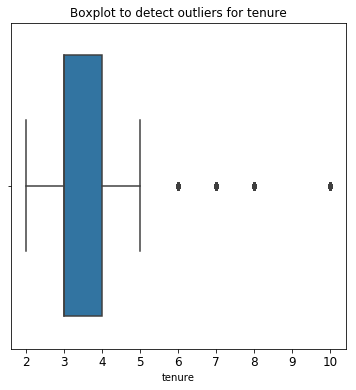

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot shows that there are outliers in the tenure variable.It would be helpful to investigate how many rows in the data contain outliers in the tenure column.


In [13]:
# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove these outliers based on the type of model you decide to use.

## pAce: Analyze Stage

* Perform EDA (analyze relationships between variables) 

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


## Data visualizations

Let's start by creating a stacked boxplot showing average_monthly_hours distributions for number_project, comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, Let's plot a stacked histogram to visualize the distribution of number_project for those who stayed and those who left.

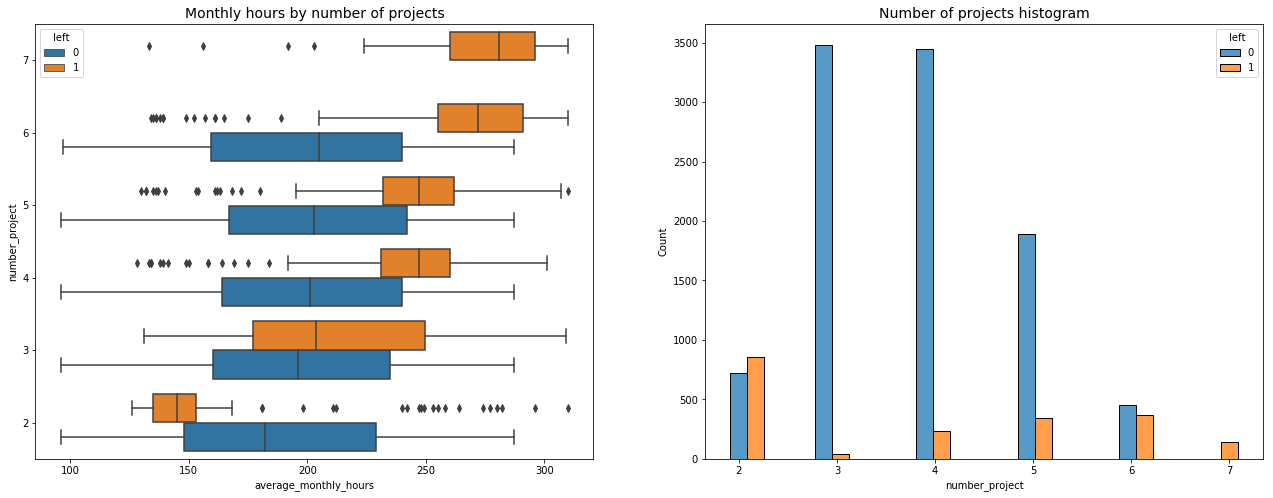

In [15]:
# Create a boxplot and stacked histogram 

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It's quite plausible that individuals involved in more projects tend to extend their working hours. This trend is evident in the data, where the average weekly hours for both groups (those who stayed and those who left) increase as the number of projects rises. However, several noteworthy observations emerge from this analysis.

Firstly, among the employees who left the company, there are two distinct subgroups: (A) those who worked significantly fewer hours than their peers with the same number of projects, and (B) those who worked considerably more. In the case of group A, it's conceivable that they may have been terminated. Alternatively, this group might include employees who had already submitted their resignation and consequently were assigned reduced hours due to their imminent departure. For group B, it's reasonable to deduce that they likely resigned voluntarily. Individuals in group B probably made substantial contributions to the projects they were involved in, possibly being the primary contributors.

Another intriguing finding is that all employees with seven projects left the company. Additionally, both the interquartile ranges for this group and those who left with six projects spanned approximately 255 to 295 hours per week, significantly more than any other group.

The optimal number of projects for employees appears to be in the range of 3 to 4, as indicated by the notably low turnover rate in these cohorts.

If we assume a standard work week of 40 hours and two weeks of vacation per year, the average monthly working hours for employees working Monday to Friday would be approximately 166.67 hours. Remarkably, except for the employees involved in two projects, every other group, including those who remained with the company, logged substantially more hours than this benchmark. This suggests a prevailing issue of employee overwork within the organization.

As a next step, it would be prudent to confirm whether all employees with seven projects indeed left the company.

In [16]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

This confirms that all employees with 7 projects did leave.Next, you could examine the average monthly hours versus the satisfaction levels.


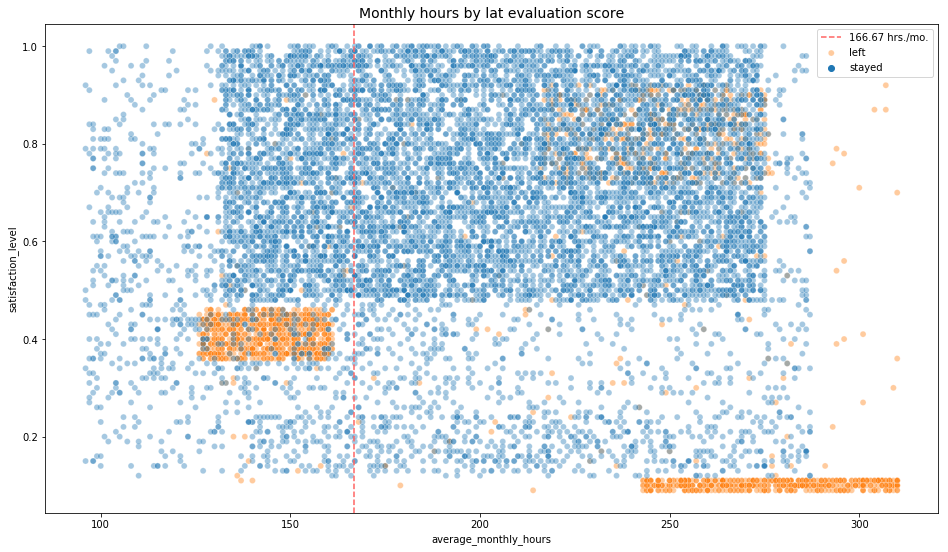

In [17]:
#Create a scatterplot of 'avergae_monthly_hours' versus 'datisfaction_level'
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,x='average_monthly_hours',y='satisfaction_level',hue='left',alpha=0.4)
plt.axvline(x=166.67,color='#ff6361',label='166.67 hrs./mo.',ls='--')
plt.legend(labels=['166.67 hrs./mo.','left','stayed'])
plt.title('Monthly hours by lat evaluation score',fontsize='14');

The scatterplot displayed above illustrates a significant cluster of employees who logged approximately 240 to 315 hours each month. To put this in perspective, working 315 hours a month equates to over 75 hours per week for an entire year. It's reasonable to assume that this extended work time might be linked to their remarkably low satisfaction levels.

Additionally, the plot reveals another segment of employees who departed the company, and they adhered to more conventional work hours. Nevertheless, their satisfaction levels only averaged around 0.4. It's challenging to make definitive conclusions about their reasons for leaving, but it's plausible that they felt compelled to work longer hours, possibly influenced by the prevalence of their colleagues working such extended hours. This external pressure could have contributed to their diminished satisfaction levels.

Lastly, there's a group of individuals who maintained a workload of approximately 210 to 280 hours per month, and their satisfaction levels spanned from about 0.7 to 0.9.

It's noteworthy to observe the peculiar shape of these distributions. This irregular pattern suggests the possibility of data manipulation or the inclusion of synthetic data.

For the next visualization, it could be intriguing to explore satisfaction levels relative to employee tenure.


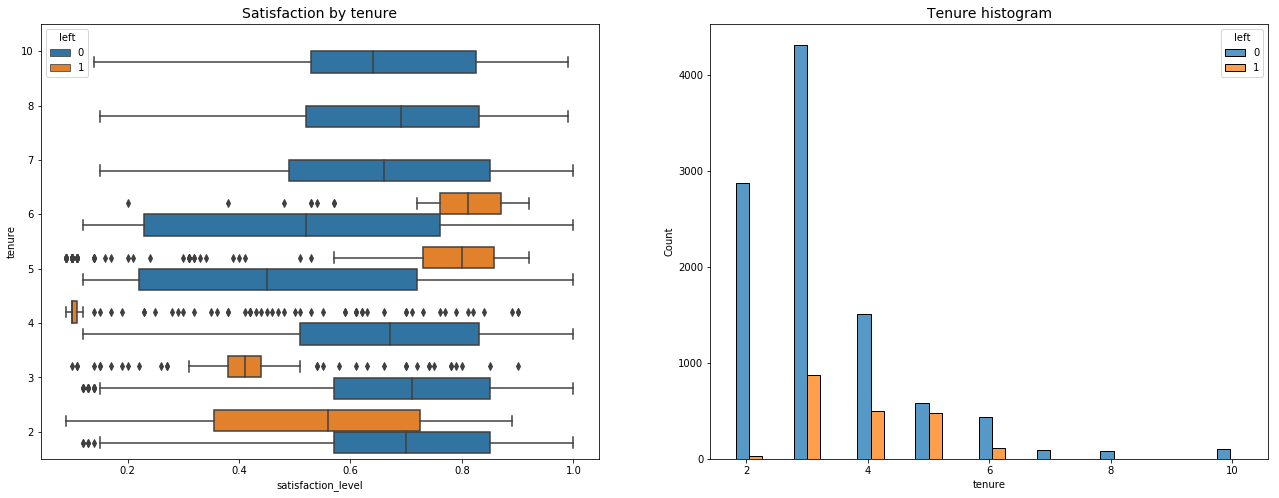

In [20]:
# Create a plot as needed 

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Numerous insights can be gleaned from examining this plot:

    Departing employees can be broadly categorized into two groups: those with shorter tenures who are dissatisfied and those with medium-length tenures who are very satisfied.

    Notably, employees with four years of tenure who left the company exhibit an unusually low level of satisfaction. It would be worthwhile to investigate whether any changes in company policies around the four-year mark may have had a specific impact on this group.

    The most long-standing employees opted to remain with the company, and their satisfaction levels closely resemble those of newer employees who chose to stay as well.

    The histogram provides insight into the distribution of employee tenures, indicating that there are relatively few individuals with extensive tenures. This suggests the possibility that these longer-tenured employees could be occupying higher-ranking and higher-paid positions within the organization.

As the next step in data analysis, it would be beneficial to calculate the mean and median satisfaction scores for both departing and staying employees.

In [21]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 
Next, Let's examine salary levels for different tenures.

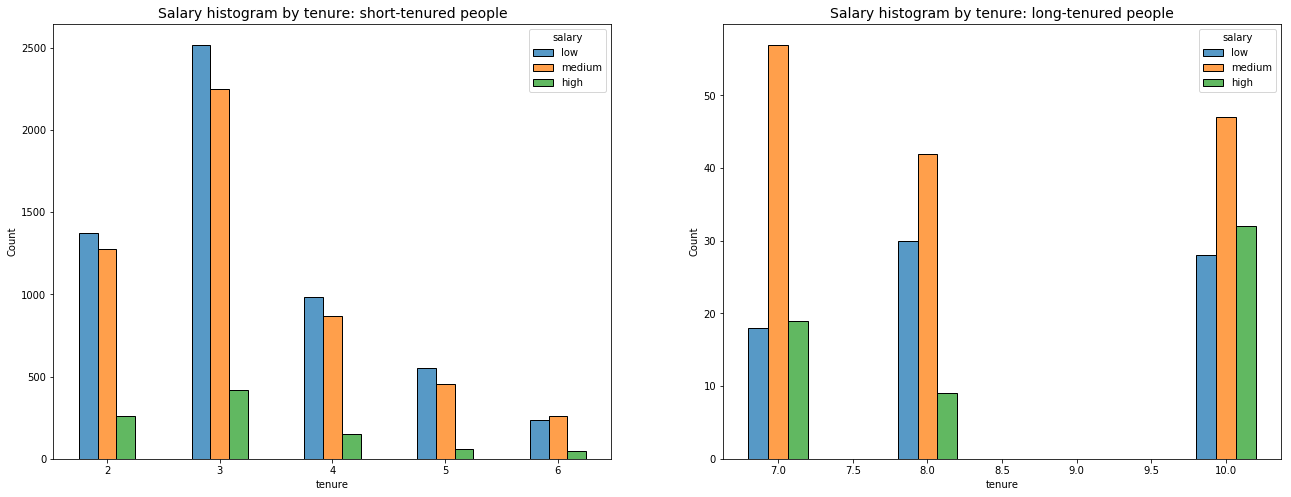

In [23]:
# Create a plot as needed 
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The visual representations displayed above indicate that employees with extended tenures were not significantly skewed toward higher salary brackets.

Moving forward, it would be valuable to investigate whether there exists a correlation between prolonged working hours and receiving high evaluation scores. This exploration could involve generating a scatterplot that juxtaposes average monthly hours against last evaluation scores.

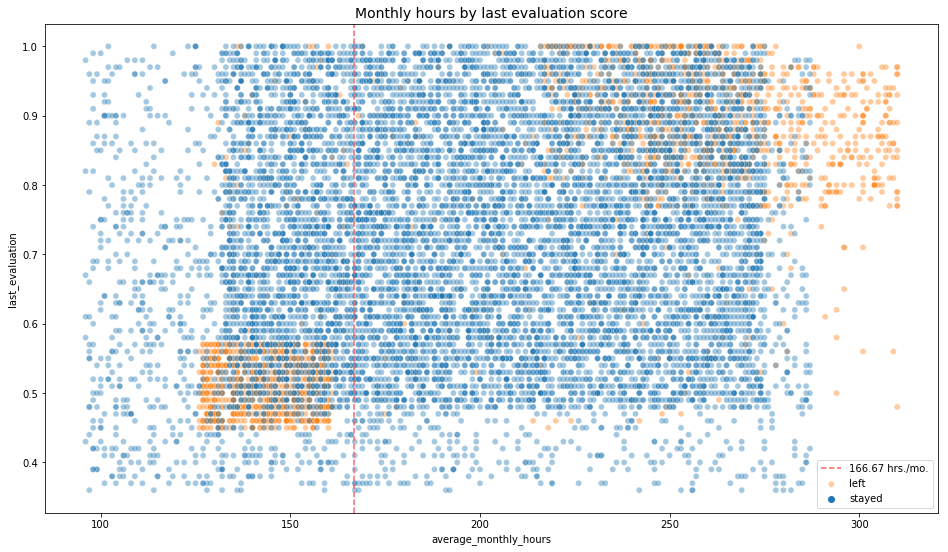

In [24]:
# Create a plot as needed 

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

From the scatterplot provided above, several noteworthy observations come to light:

    The scatterplot delineates two distinct categories of departing employees: the first group comprises overworked individuals who demonstrated outstanding performance, while the second consists of employees who worked slightly below the standard monthly average of 166.67 hours and received lower evaluation scores.

    There appears to be an apparent correlation between the number of hours worked and the corresponding evaluation score.

    It's important to note that the upper left quadrant of the plot does not contain a substantial percentage of employees. This implies that working extended hours does not necessarily guarantee a favorable evaluation score.

    The majority of employees within this company tend to exceed the threshold of 167 hours worked per month.

As a logical next step in the analysis, it would be insightful to investigate whether employees who dedicated extensive hours to their work were subsequently promoted within the last five years.

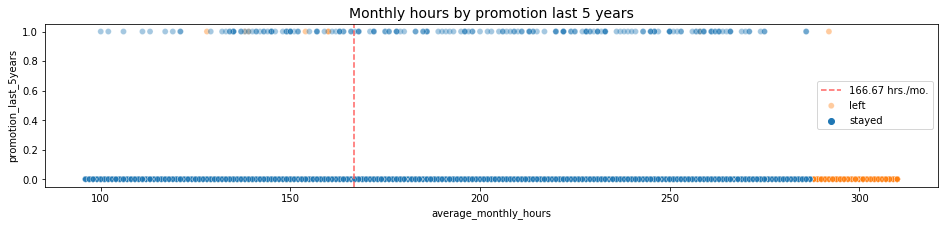

In [25]:
# Create a plot as needed 

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

* There is a limited number of employees who left the company despite being promoted in the last five years.

* Only a few employees who worked the most hours managed to attain promotions.

* It's worth highlighting that all departing employees were consistently working the longest hours.

Next, let's inspect how the employees who left are distributed across departments.

In [26]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

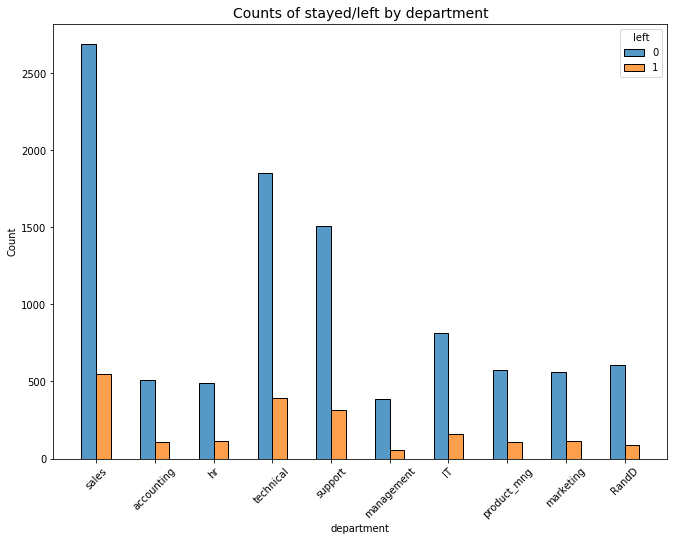

In [27]:
# Create a plot as needed 

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Lastly, you could check for strong correlations between variables in the data.


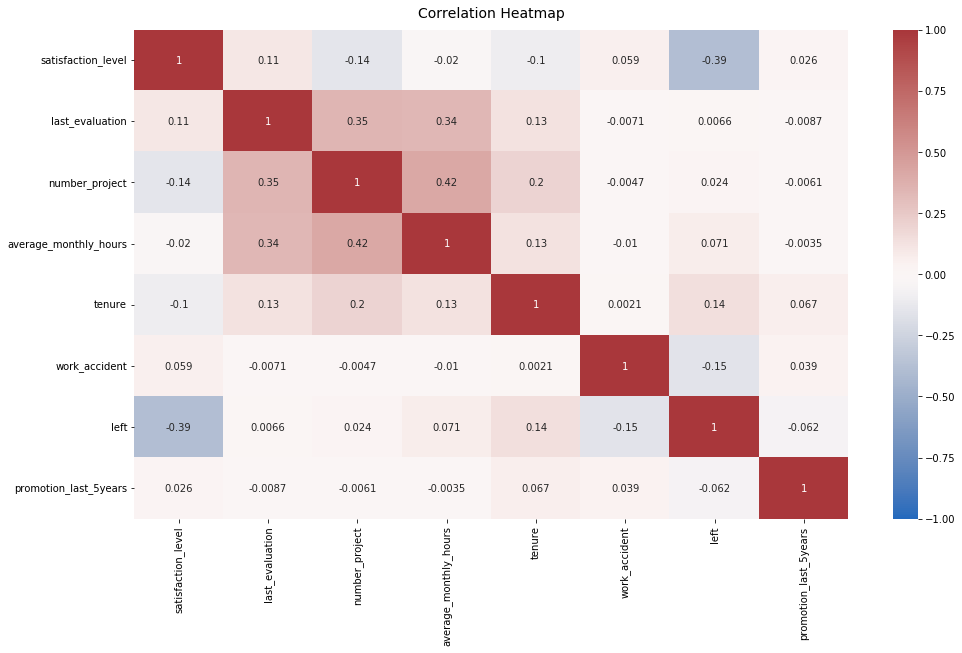

In [28]:
# Create a plot as needed 
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap affirms that the number of projects, monthly hours, and evaluation scores exhibit positive correlations among themselves. 
In contrast, the decision of whether an employee departs from the company demonstrates a negative correlation with their satisfaction level.

### Insights

It seems that employee departures from the company are linked to issues in management. Leaving is associated with extended work hours, involvement in numerous projects, and overall lower satisfaction levels. Working long hours without receiving promotions or favorable evaluation scores can lead to dissatisfaction. There is a significant contingent of employees in the company who may be experiencing burnout. Additionally, it appears that employees with more than six years of tenure at the company are less inclined to leave.

## paCe: Construct Stage


    * Determine which models are most appropriate
    * Construct the model
    * Confirm model assumptions
    * Evaluate model results to determine how well your model fits the data


### Recall model assumptions

##### Logistic Regression model assumptions

    * Outcome variable is categorical
    * Observations are independent of each other
    * No severe multicollinearity among X variables
    * No extreme outliers
    * Linear relationship between each X variable and the logit of the outcome variable
    Sufficiently large sample size


## Step 3. Model Building, Step 4. Results and Evaluation

    * Fit a model that predicts the outcome variable using two or more independent variables
    * Check model assumptions
    * Evaluate the model



The objective is to anticipate whether an employee departs from the company, 
which constitutes a categorical outcome variable. 
This task pertains to classification, specifically binary classification, as the outcome variable "left" can assume two values: 1 (indicating the employee left) or 0 (indicating the employee did not leave).

### Identify the types of models most appropriate for this task.

Given that the variable we aim to predict (whether an employee leaves the company) is categorical, we have the option to construct either a Logistic Regression model or a Tree-based Machine Learning model. Therefore, we can choose one of these two approaches to proceed with, or if you prefer, you can implement both and assess their comparative performance.

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression

### Logistic regression

Note that binomial logistic regression suits the task because it involves binary classification.


Before splitting the data, encode the non-numeric variables. There are two: department and salary.

Department is a categorical variable, which means you can dummy it for modeling.

* salary is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.


In [31]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Create a heatmap to visualize how correlated variables are. Consider which variables we're interested in examining correlations between.

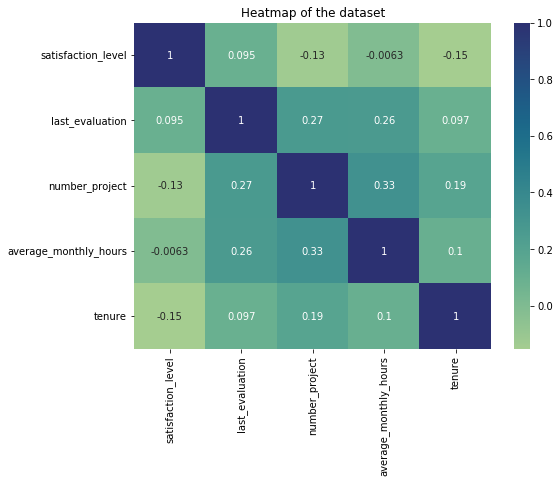

In [32]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Generate a stacked bar plot to illustrate the distribution of employees across departments, making a comparison between those who departed and those who remained.

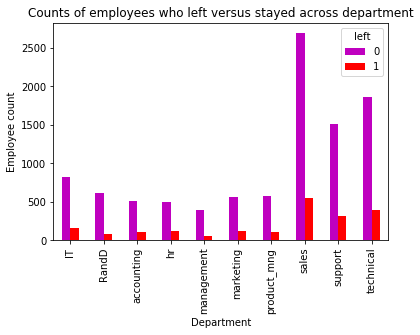

In [33]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

As logistic regression is notably influenced by outliers, it's better to eliminate the outliers previously identified in the tenure column.

In [34]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Isolate the outcome variable, which is the variable you want your model to predict.

In [35]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Select the features you want to use in your model. 
Consider which variables will help you predict the outcome variable, left.

In [37]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Split the data into training set and testing set. 
Don't forget to stratify based on the values in y, since the classes are unbalanced.

In [38]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construct a logistic regression model and fit it to the training dataset.

In [39]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Test the logistic regression model: use the model to make predictions on the test set.

In [40]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model. 

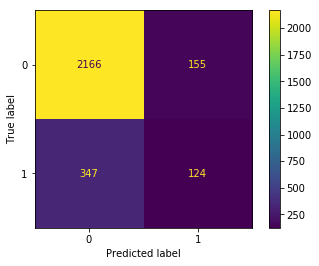

In [41]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.


In [42]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There's an approximate 83%-17% division in the data. It's not perfectly balanced, but it doesn't exhibit severe imbalance either. In scenarios with more pronounced imbalance, it might be necessary to adjust the data through resampling methods to achieve a better balance. However, in this case, you can proceed with the existing data class balance and proceed with model evaluation.

In [43]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report displayed above indicates that the logistic regression model obtained a precision of 79%, a recall of 82%, an f1-score of 80% (all weighted averages), and an accuracy of 82%. Nevertheless, when the primary focus is on predicting employees who depart, these scores noticeably decrease.

### Modeling Approach B: Tree-based Model

This approach covers implementation of Decision Tree and Random Forest.


In [44]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [45]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Split the data into training, validating, and testing sets.

In [47]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Decision tree - Round 1
Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [48]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [49]:
%%time
tree1.fit(X_train, y_train)

Wall time: 3.14 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

Identify the optimal values for the decision tree parameters.

In [50]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [51]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, you can write a function that will help you extract all the scores from the grid search.


In [53]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Use the function "make_results", to get all the scores from grid search.

In [63]:
tree1_cv_results=make_results('Decision tree cv',tree1,'auc')

All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.


### Random forest - Round 1

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [64]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [65]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

Wall time: 8min 59s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [66]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

Identify the optimal values for the parameters of the random forest model.


In [67]:
# Check best params
rf1.best_params_


{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [68]:
### Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The evaluation metrics for the random forest model surpass those of the decision tree model, except for a slight exception in recall (where the random forest model's score is approximately 0.001 lower, an insignificant difference).
This suggests that, on the whole, the random forest model demonstrates superior performance compared to the decision tree model. 
Next, let's evaluate the final model on the test set.
                                                                                                                                      

#### Define a function that gets all the scores from a model's predictions.

In [69]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Now use the best performing model to predict on the test set.

In [71]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The test scores closely resemble the validation scores, which is a positive outcome. This suggests that the model is robust and reliable. Because this test set was exclusively employed for this particular model, you can have greater confidence that the model's performance on this data accurately reflects how it will perform on new, unseen data.

#### Feature Engineering

#### Data leakage

Data leakage happens when you use data during model training that you shouldn't use, either because it's part of the test data or because it's data you wouldn't realistically have when the model is used in the real world. When you train a model with leaked data, it can produce unrealistically high scores that may not hold up in actual use.

In this case, it's likely that not all employees have reported their satisfaction levels, which could be a source of data leakage. Also, the "average_monthly_hours" column may contribute to this issue. If employees have already decided to leave or have been marked for termination by management, they might reduce their working hours.

To address this concern, the next round of decision tree and random forest models will involve feature engineering to create better models. One approach is to remove the "satisfaction_level" variable and instead introduce a new feature called "overworked" to roughly indicate if an employee is overworked or not. This new feature will be a simple binary variable.

In [73]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [74]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


Approximately 166.67 represents the average monthly working hours for an individual who works 50 weeks annually, 5 days each week, with 8 hours per day.

To establish the definition of "overworked" as working more than 175 hours per month on average, you can transform the "overworked" column into a binary format using a boolean mask.

Here's how to accomplish this:

    * df3['overworked'] > 175 generates a series of booleans, marking True for values exceeding 175 and False for values less than or equal to 175.
    * .astype(int) converts all True values to 1 and all False values to 0.



In [75]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [76]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Again, isolate the features and target variables

In [77]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

Split the data into training and testing sets.

In [78]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Decision tree - Round 2

In [79]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [80]:
%%time
tree2.fit(X_train, y_train)

Wall time: 2.6 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [81]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [82]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and detailed hours worked data. Next, check the other scores.


In [83]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

### Random forest - Round 2

In [84]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [85]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  FitFailedWarning)
C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

Wall time: 7min 2s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [86]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [87]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [88]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

Score the champion model on the test set now.


In [90]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


This seems to be a stable, well-performing final model.Plot a confusion matrix to visualize how well it predicts on the test set.


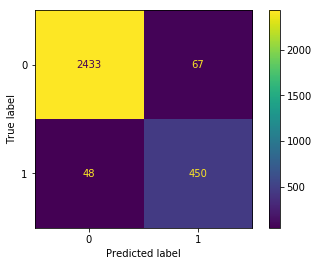

In [91]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. 
But this is still a strong model. For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model.

### Decision tree splits

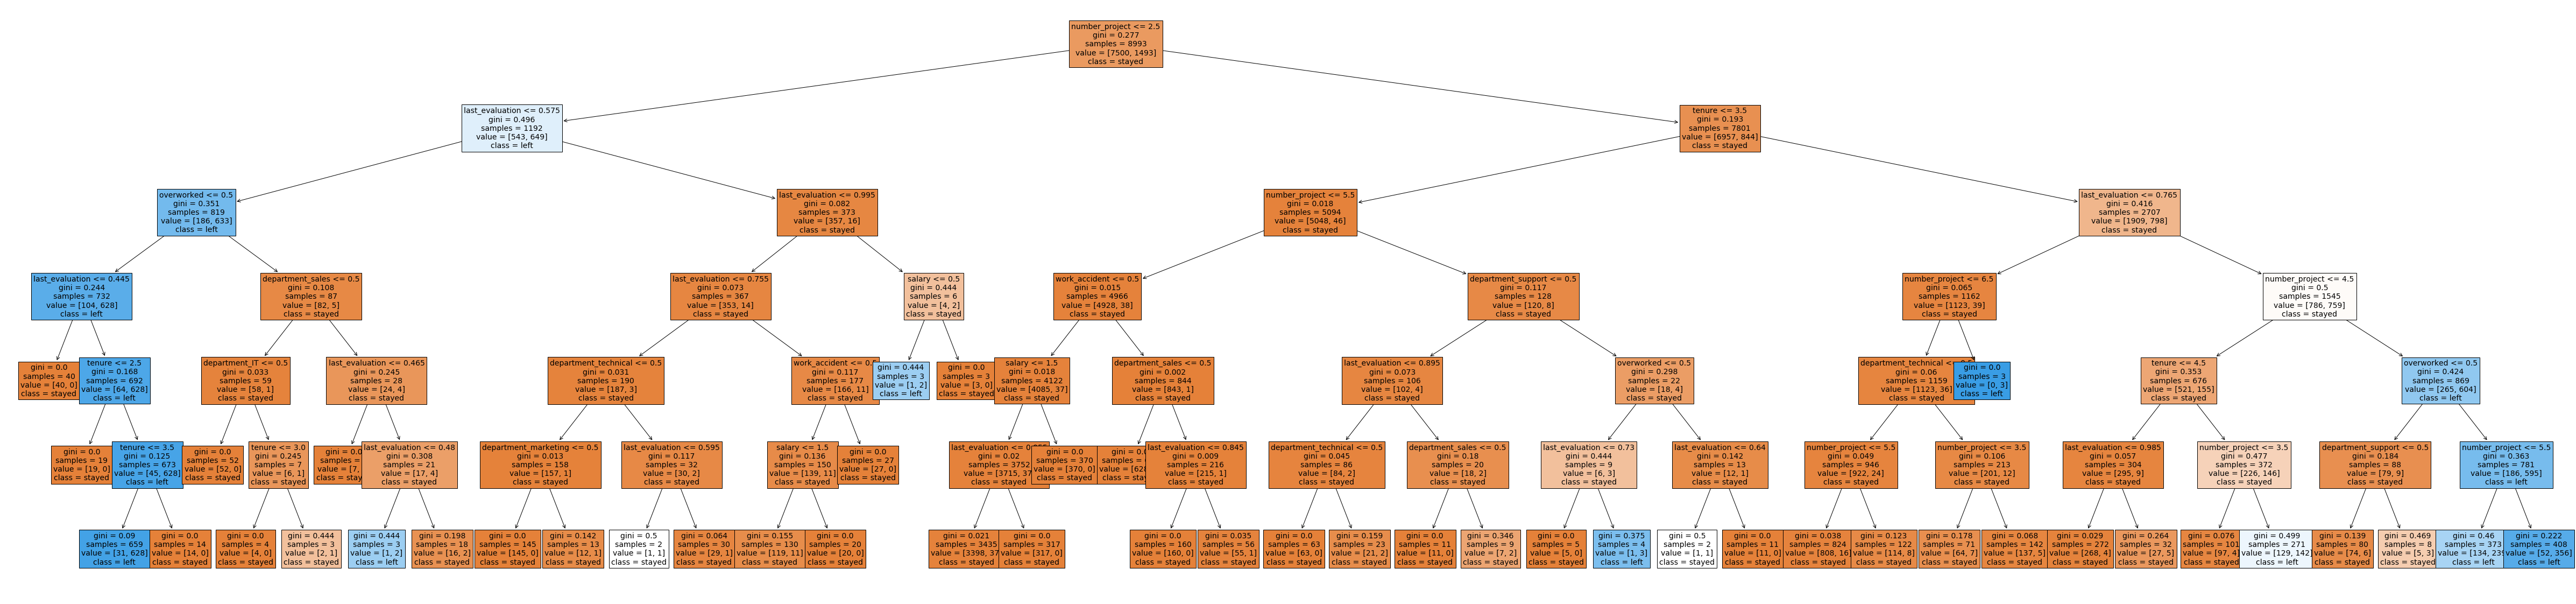

In [92]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

Note that you can double-click on the tree image to zoom in on it and inspect the splits.

#### Decision tree feature importance
You can also get feature importance from decision trees (see the DecisionTreeClassifier scikit-learn documentation for details).

In [94]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


You can then create a barplot to visualize the decision tree feature importances.

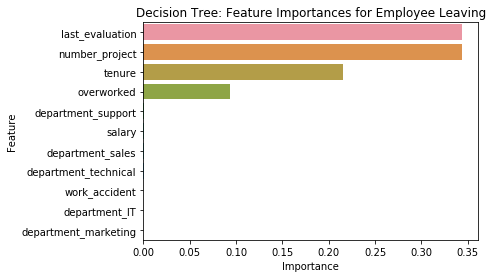

In [95]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot presented above illustrates that, within this decision tree model, the variables last_evaluation, number_project, tenure, and overworked exhibit the highest levels of importance, ranked in that order. These particular variables play a prominent role in predicting the outcome variable, which is "left.

### Random forest feature importance
Now, plot the feature importances for the random forest model.


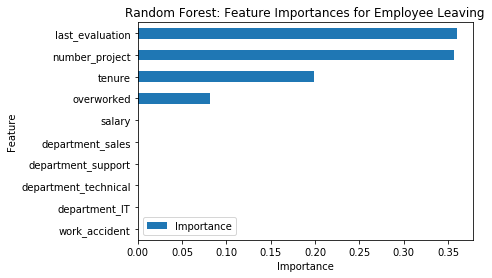

In [96]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The displayed plot above indicates that within this random forest model, the variables last_evaluation, number_project, tenure, and overworked hold the highest levels of importance, in that specific sequence. These particular variables are particularly influential in predicting the outcome variable "left," and notably, they align with the variables employed by the decision tree model.

### pacE: Execute Stage

    Interpret model performance and results
    Share actionable steps with stakeholders



Assessing Evaluation Metrics for Recall:

   * AUC (Area Under the ROC Curve): This metric quantifies the probability that the model will rank a randomly chosen positive example higher than a randomly selected negative example.

   *  Precision: Precision gauges the fraction of predicted positive data points that are genuinely positive, essentially representing the ratio of true positives to all predicted positives.

   * Recall: Recall calculates the proportion of actual positive data points that are predicted as positive, measuring the percentage of true positives out of all actual positives.

   * Accuracy: Accuracy quantifies the proportion of data points that are accurately classified by the model.

   * F1-score: The F1-score is a composite metric that combines precision and recall to provide a balanced assessment of model performance.

Step 4. Results and Evaluation

    Interpret model
    Evaluate model performance using metrics
    Prepare results, visualizations, and actionable steps to share with stakeholders



Summary of model results

Logistic Regression

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.


#### Conclusion, Recommendations, and Next Steps:

Based on the models and the insights derived from feature importance, it becomes evident that employees within the company are grappling with issues related to being overworked.

To enhance employee retention, the following recommendations can be presented to stakeholders:

    * Implement a project cap to limit the number of projects assigned to employees.
    * Consider promoting employees who have completed a minimum of four years with the company, or delve deeper into understanding the dissatisfaction of four-year tenured employees.
    * Evaluate options to reward employees for longer hours worked or make extended work hours voluntary.
    * Ensure that employees are well-informed about the company's overtime pay policies. Clearly define workload expectations and time-off policies.
    * Facilitate open discussions at both company-wide and team-specific levels to comprehensively address work culture concerns.
    * Reconsider the allocation of high evaluation scores, ensuring that they are not exclusively tied to employees working 200+ hours per month. Explore a more equitable system for rewarding employees based on their contributions and efforts.

#### Next Steps:

Despite the progress made, it is prudent to remain cautious about potential data leakage. Consider evaluating how predictions change when the "last_evaluation" feature is removed from the dataset. It's possible that evaluations occur infrequently, so predicting employee retention without this feature could be valuable. Alternatively, if evaluation scores are a key factor in employee decisions, exploring the prediction of performance scores or satisfaction scores could be beneficial.

As a separate project, you may explore building a K-means model on this data to analyze clusters, potentially uncovering valuable insights.

